<a href="https://colab.research.google.com/github/stefanoridolfi/Coding_ML/blob/master/MLP_1_hidden_3_output_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

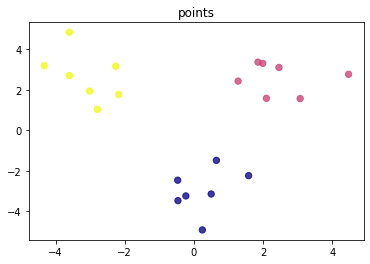

final values
bh shape (4,)
bh [ 0.09145742 -1.7542261   0.1624902  -1.10333782]
zh shape (21, 4)
zh [[-5.74248437 -4.36460145 -5.20971216 -3.12535163]
 [-2.70379275 -3.72112266 -2.46265187 -1.43057181]
 [-5.83129407 -3.11350867 -5.19933985 -4.31246773]
 [-4.20573556 -5.79799863 -3.94601234 -0.69269152]
 [-4.37396543 -2.26697183 -3.84347183 -3.98154832]
 [-6.22994762 -2.83178028 -5.53359408 -4.86280786]
 [-8.97798644 -4.88543942 -8.12296374 -5.07709611]
 [ 4.42404044 -2.68938939  3.94700311  2.97275824]
 [ 5.95152188 -3.47804541  5.24849345  4.82092835]
 [ 2.76210137 -4.61365941  2.33231505  3.45434699]
 [ 4.66082481 -8.19603773  3.76436081  8.08262932]
 [ 2.62228112 -6.36075185  2.08330175  4.91489768]
 [ 5.52125904 -4.42541134  4.7983958   5.34799309]
 [ 6.08115044 -3.19781802  5.38372708  4.66678725]
 [ 5.50630102  6.15692223  5.54057721 -4.14290968]
 [ 9.45134386  7.33683114  9.13159776 -2.25123243]
 [ 4.02645673  4.68865277  4.12030904 -3.93370589]
 [ 3.62609032  3.10763223  3.6515

In [14]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

cat_images = np.random.randn(7, 2) + np.array([0, -3])
mouse_images = np.random.randn(7, 2) + np.array([3, 3])
dog_images = np.random.randn(7, 2) + np.array([-3, 3])
feature_set = np.vstack([cat_images, mouse_images, dog_images])
labels = np.array([0]*7 + [1]*7 + [2]*7)
one_hot_labels = np.zeros((21, 3))
for i in range(21):
    one_hot_labels[i, labels[i]] = 1

plt.scatter(feature_set[:,0], feature_set[:,1], c=labels,cmap='plasma', s=40, alpha=0.8)
plt.title("points")
plt.show()
#print(feature_set.shape)

#----------------------------------#
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

instances = feature_set.shape[0]
attributes = feature_set.shape[1]
hidden_nodes = 4
output_labels = 3

# wh=[2,hid]
# bh=[hid,1]
wh = np.random.rand(attributes,hidden_nodes)
bh = np.random.randn(hidden_nodes)

# wo=[hid,m]
#bo=[m,1]
wo = np.random.rand(hidden_nodes,output_labels)
bo = np.random.randn(output_labels)
lr = 10e-4

error_cost = []

for epoch in range(5000):
############# feedforward

    # Phase 1
    zh = np.dot(feature_set, wh) + bh
    ah = sigmoid(zh)

    # Phase 2
    zo = np.dot(ah, wo) + bo
    ao = softmax(zo)
  
########## Back Propagation

########## Phase 1

    dcost_dzo = ao - one_hot_labels
    dzo_dwo = ah

    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)

    dcost_bo = dcost_dzo

########## Phases 2

    dzo_dah = wo
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = sigmoid_der(zh)
    dzh_dwh = feature_set
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

    dcost_bh = dcost_dah * dah_dzh

    # Update Weights ================

    wh -= lr * dcost_wh
    bh -= lr * dcost_bh.sum(axis=0)

    wo -= lr * dcost_wo
    bo -= lr * dcost_bo.sum(axis=0)

    if epoch % 200 == 0:
        loss = np.sum(-one_hot_labels * np.log(ao))
        #print('Loss function value: ', loss)
        error_cost.append(loss)
print("final values")

print("bh shape",bh.shape)
print("bh",bh)
print("zh shape",zh.shape)
print("zh",zh)
print("zh+wh\n",zh+bh)
